<a href="https://colab.research.google.com/github/martinsadw/alura/blob/main/Data%20Science%20-%20analise%20e%20visualiza%C3%A7%C3%A3o%20de%20dados/Movie_Lens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Movie Lens

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2024-04-09 08:12:07--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.43MB/s    in 0.7s    

2024-04-09 08:12:08 (1.43 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies['year'] = pd.to_numeric(movies['title'].str.extract(r'\((\d{4})\)')[0])
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
5,6,Heat,Action|Crime|Thriller,1995.0
6,7,Sabrina,Comedy|Romance,1995.0
7,8,Tom and Huck,Adventure|Children,1995.0
8,9,Sudden Death,Action,1995.0
9,10,GoldenEye,Action|Adventure|Thriller,1995.0


In [ ]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
print("Media:", ratings.rating.mean())
print("Mediana:", ratings.rating.median())
print("Moda:", ratings.rating.mode())

Media: 3.501556983616962
Mediana: 3.5
Moda: 0    4.0
Name: rating, dtype: float64


In [ ]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<Axes: ylabel='Frequency'>

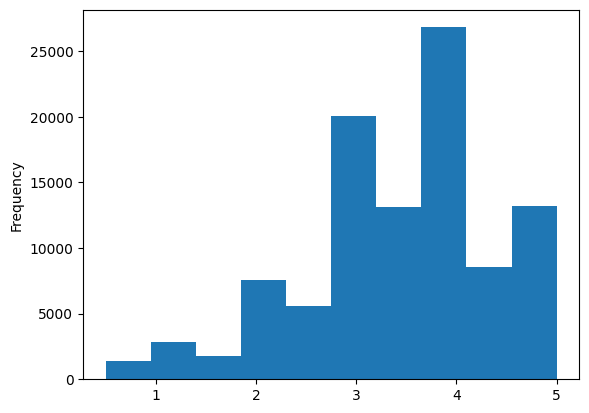

In [ ]:
ratings.rating.plot(kind="hist")

<Axes: xlabel='rating'>

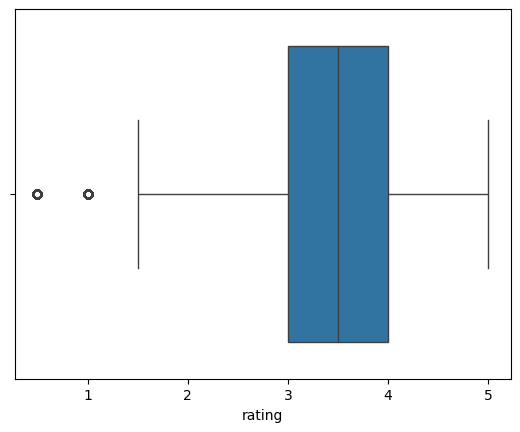

In [ ]:
sns.boxplot(x=ratings.rating)

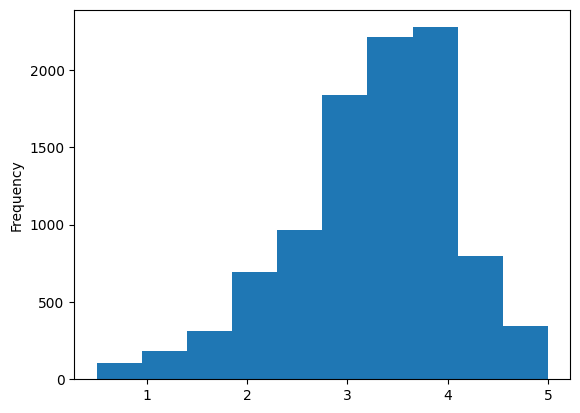

In [ ]:
mean_by_movie = ratings.groupby('movieId').mean().rating
mean_by_movie.plot(kind='hist');

In [ ]:
mean_by_movie

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [ ]:
movies = movies.join(mean_by_movie, on='movieId', how='inner')

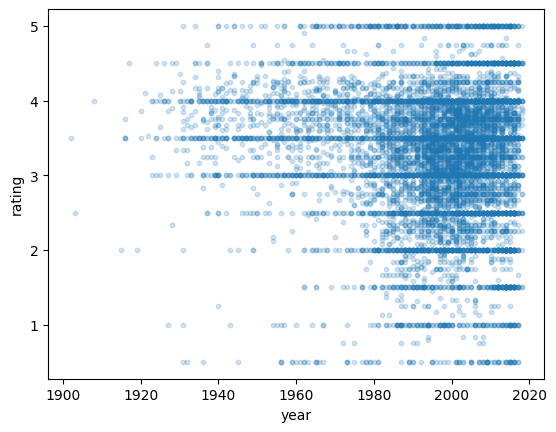

In [ ]:
movies.plot.scatter('year', 'rating', s=10, alpha=0.2);

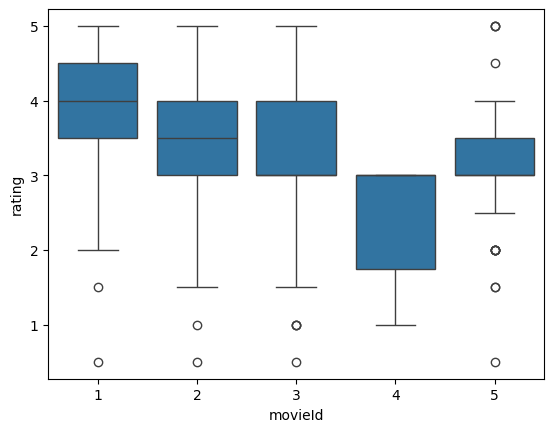

In [ ]:
sns.boxplot(x='movieId', y='rating', data=ratings.query('movieId in [1, 2, 3, 4, 5]'));

In [ ]:
print(ratings.query('movieId==1').rating.std(), ratings.query('movieId==2').rating.std())

0.8348591407114047 0.8817134921476455


# TMDB

In [ ]:
# https://www.kaggle.com/discussions/general/74235#2580958
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
# https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
!kaggle datasets download -d tmdb/tmdb-movie-metadata
!unzip tmdb-movie-metadata.zip

100% 8.89M/8.89M [00:00<00:00, 25.7MB/s]
100% 8.89M/8.89M [00:00<00:00, 21.2MB/s]
Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [ ]:
tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb_credits = pd.read_csv('tmdb_5000_credits.csv')
tmdb_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
tmdb_movies.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [ ]:
tmdb_movies[tmdb_movies.original_language == 'pt'][['original_title', 'vote_average', 'vote_count']]

,original_title,vote_average,vote_count
2915,Trash,7.1,242
3417,Tropa de Elite,7.8,504
3797,Praia do Futuro,6.4,31
3818,Casa de Areia,6.7,9
3866,Cidade de Deus,8.1,1814
3974,Central do Brasil,7.6,126
4303,Que Horas Ela Volta?,7.8,165
4684,Solitude,0.0,0
4751,"Gabriela, Cravo e Canela",6.0,2


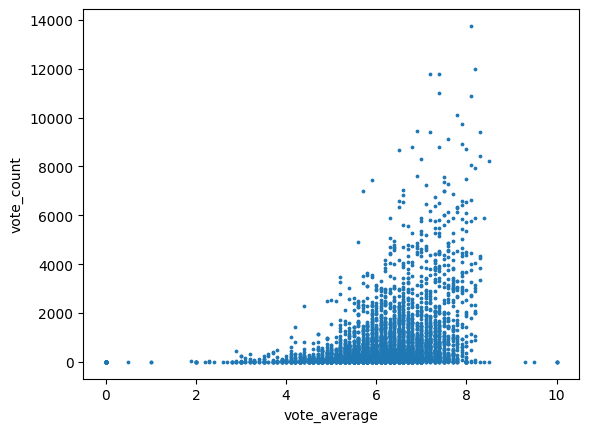

In [ ]:
tmdb_movies.plot.scatter('vote_average', 'vote_count', s=3);

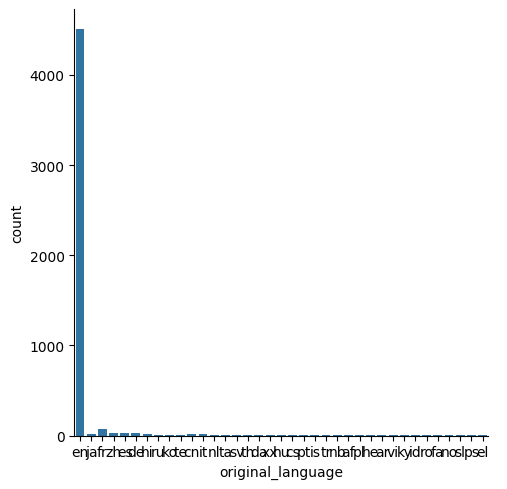

In [ ]:
sns.catplot(x='original_language', kind='count', data=tmdb_movies)

<Axes: xlabel='language', ylabel='quantity'>

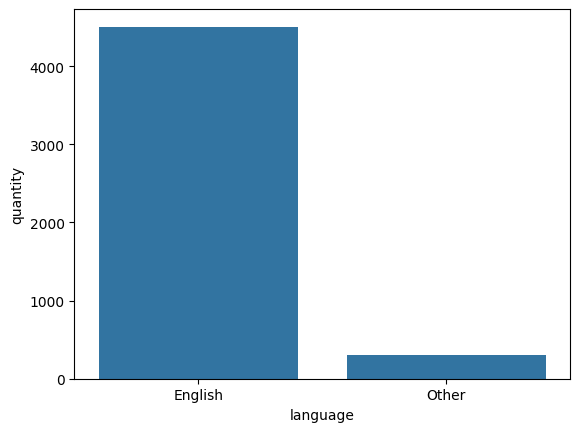

In [ ]:
en_movies_quant = (tmdb_movies.original_language == 'en').sum()
not_en_movies_quant = (tmdb_movies.original_language != 'en').sum()
movies_language = pd.DataFrame({'language': ['English', 'Other'], 'quantity': [en_movies_quant, not_en_movies_quant]})
sns.barplot(x='language', y='quantity', data=movies_language)

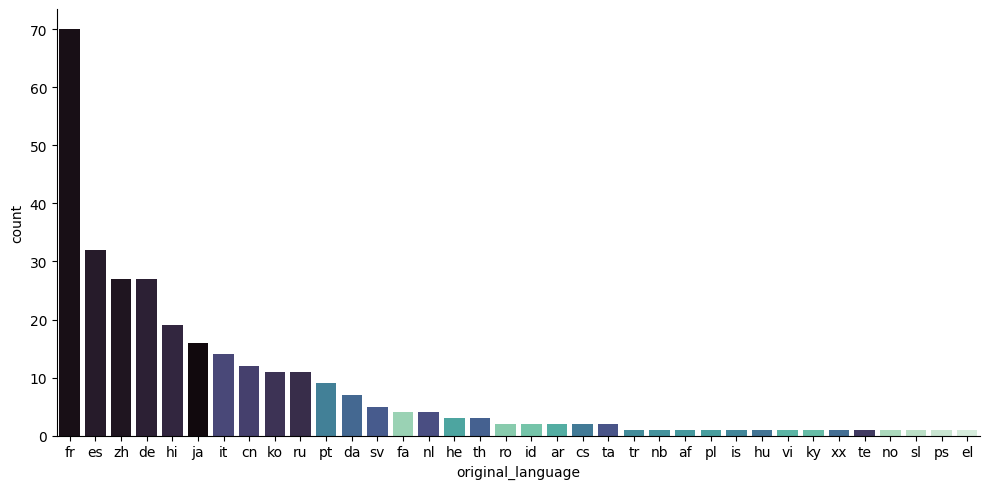

In [ ]:
not_en_movies = tmdb_movies.query('original_language != "en"')
cat_order = not_en_movies.original_language.value_counts()
sns.catplot(x='original_language', hue='original_language', kind='count', data=not_en_movies, height=5, aspect=2, order=cat_order.index, palette="mako");

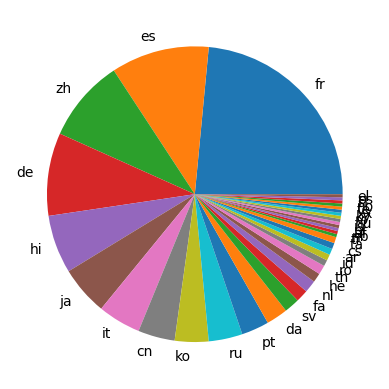

In [ ]:
# DANGER, PIE CHART AHEAD, DO NOT TRY THIS GRAPH AT HOME!!!
not_en_movies_languages = not_en_movies.original_language.value_counts().to_frame().reset_index()
plt.pie(not_en_movies_languages['count'], labels=not_en_movies_languages.original_language)
plt.show()

# Extra

In [ ]:
df = sns.load_dataset('anscombe')

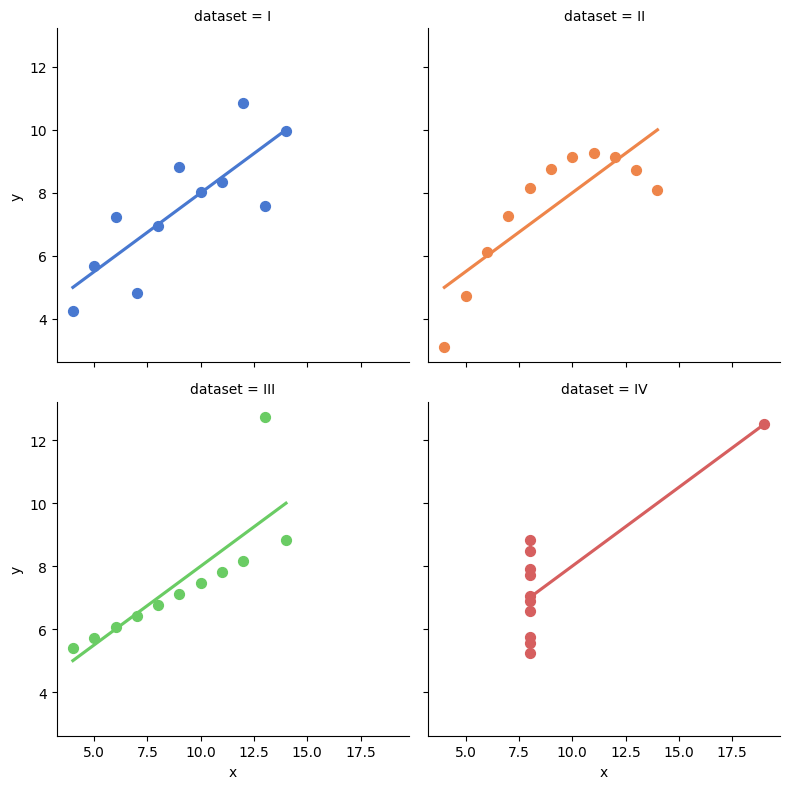

In [ ]:
sns.lmplot(x='x', y='y', hue='dataset', col='dataset', data=df, col_wrap=2, ci=None, palette='muted', height=4, scatter_kws={'s': 50, 'alpha': 1});